In [5]:
# Data Loading and Preprocessing 

In [535]:
import pandas as pd
import sklearn as sk
import numpy as np
import tarfile
import os
import re
from sklearn.preprocessing import LabelEncoder

with tarfile.open("census.tar.gz", "r:*") as tar:
    print(tar.getnames())
    csv_path = tar.getnames()[0]
    csv_names = tar.getnames()[1]
    csv_test = tar.getnames()[2] #test file

    #Debugging
    with tar.extractfile(csv_path) as raw_file:
        raw_data = raw_file.read().decode('utf-8').strip().split('\n')
        for line in raw_data[:10]:  
            #print(line)
            pass
    
    #Find the file with all the names
    names = tar.extractfile(csv_names)

    #Get the column names 
    column_names = []
    with tar.extractfile(csv_names) as file:
        lines = file.readlines()
        for i in range(23, 70): 
            #Decode bytes to strings
            line = lines[i].decode('utf-8').strip()
            #Split at the '|' then at the tab to find the column name
            if '|' in line:
                column_value = line.split('|')[1].split('\t')[0] 
                column_names.append(column_value)  # Add to the column_names list

    #Remove the blank space and incorrect columns and add the proper names
    column_names.remove('')
    column_names.remove(' Basic statistics for this data set:')
    column_names.append(' year')
    column_names.append(' label')
    
    # Remove specified columns
    columns_to_remove = [
        ' federal income tax liability',
        ' instance weight',
        ' total person earnings',
        ' total person income',
        ' taxable income amount',
        ' adjusted gross income'
    ]
    
    # Remove from both the list and DataFrame
    for col in columns_to_remove:
        if col in column_names:
            column_names.remove(col)
    
    df = pd.read_csv(tar.extractfile(csv_path),header=0)

    indexes_to_remove = []
    for name in column_names:
        if name in columns_to_remove:
            indexes_to_remove.append(name)
    
    # Drop the identified columns
    df.drop(columns=df.columns[indexes_to_remove], inplace=True)

    #Remove the repeated value migration code-move within reg
    df.drop(columns=df.columns[27], inplace=True)

    #Set up test dataframe
    test_df = pd.read_csv(tar.extractfile(csv_test),header=0)
    test_df.drop(columns=df.columns[indexes_to_remove], inplace=True)
    test_df.drop(columns=df.columns[27], inplace=True)
    test_df = test_df.iloc[:, :41]
    test_df.columns = column_names
    
    df = df.iloc[:, :41]
    df.columns = column_names
    '''
    #Columns for label encoding
    nominal_columns = [
        ' class of worker',
        ' enrolled in edu last week',
        ' marital status',
        ' major occupation code',
        ' migration code-change in msa', 
        ' migration code-change in reg', 
        ' migration code-move within reg', 
        ' migration prev res in sunbelt',
        ' country of birth father',
        ' country of birth mother'
    ]

    label_encoder = LabelEncoder()
    for col in nominal_columns:
        df[col] = label_encoder.fit_transform(df[col])
        '''

    #Replace '?' with NaN
    df.replace('?', pd.NA, inplace=True)

    #Drop rows with NaN values
    df.dropna(inplace=True)
    
    #Clean up the categorical data = strings
    df = df.map(lambda x: x.strip() if isinstance(x, str) else x)
    test_df = df.map(lambda x: x.strip() if isinstance(x, str) else x)

    #Identify categorical columns
    categorical_columns = df.select_dtypes(include=['object']).columns
    categorical_columns = test_df.select_dtypes(include=['object']).columns

    #Initialize the LabelEncoder
    label_encoder = LabelEncoder()

    #Apply label encoding to each categorical column
    for col in categorical_columns:
        df[col] = label_encoder.fit_transform(df[col])
        test_df[col] = label_encoder.fit_transform(test_df[col])

display(df.head())
display(df.tail())
#print(df.columns.tolist())

'''
Features with missing values:
    migration code-change in msa - Categorical
    migration code-change in reg - Categorical
    migration code-move within reg - Categorical
    migration prev res in sunbelt - Categorical
    country of birth father - Categorical
    country of birth mother - Categorical
    All nominal
'''

['census-income.data', 'census-income.names', 'census-income.test']


,age,class of worker,industry code,occupation code,education,wage per hour,enrolled in edu inst last wk,marital status,major industry code,major occupation code,...,country of birth father,country of birth mother,country of birth self,citizenship,own business or self employed,fill inc questionnaire for veteran's admin,veterans benefits,weeks worked in year,year,label
0,58,6,4,34,16,0,2,0,4,8,...,40,40,40,4,0,1,2,52,94,0
1,18,3,0,0,0,0,1,4,14,6,...,41,41,41,0,0,1,2,0,95,0
2,9,3,0,0,10,0,2,4,14,6,...,40,40,40,4,0,1,0,0,94,0
3,10,3,0,0,10,0,2,4,14,6,...,40,40,40,4,0,1,0,0,94,0
4,48,4,40,10,16,1200,2,2,6,10,...,31,40,40,4,2,1,2,52,95,0


,age,class of worker,industry code,occupation code,education,wage per hour,enrolled in edu inst last wk,marital status,major industry code,major occupation code,...,country of birth father,country of birth mother,country of birth self,citizenship,own business or self employed,fill inc questionnaire for veteran's admin,veterans benefits,weeks worked in year,year,label
199517,87,3,0,0,5,0,2,2,14,6,...,2,40,40,4,0,1,2,0,95,0
199518,65,5,37,2,1,0,2,2,2,2,...,40,40,40,4,0,1,2,52,94,0
199519,47,3,0,0,16,0,2,2,14,6,...,32,32,11,1,0,1,2,52,95,0
199520,16,3,0,0,0,0,1,4,14,6,...,40,40,40,4,0,1,2,0,95,0
199521,32,4,42,30,12,0,2,4,12,7,...,0,0,0,0,0,1,2,52,94,0


'\nFeatures with missing values:\n    migration code-change in msa - Categorical\n    migration code-change in reg - Categorical\n    migration code-move within reg - Categorical\n    migration prev res in sunbelt - Categorical\n    country of birth father - Categorical\n    country of birth mother - Integer\n    All nominal\n'

In [387]:
''' ** Split Data and train ** '''

' **Split Data and train ** '

In [573]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, accuracy_score

X = df.iloc[:, :40]
Y = df.iloc[:, -1]

#print(X)
#print(Y)

#Split data into test and training 30% for test
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

#Set up tree with max depth of 3
tree = DecisionTreeClassifier(max_depth=3)

#Train tree
tree.fit(X_train, y_train)

#Predict results
y_pred = tree.predict(X_test)

#Evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)

#Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy:  0.9454867434051155

Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97     56200
           1       0.73      0.17      0.28      3657

    accuracy                           0.95     59857
   macro avg       0.84      0.58      0.62     59857
weighted avg       0.94      0.95      0.93     59857



In [575]:
# Visualize the tree


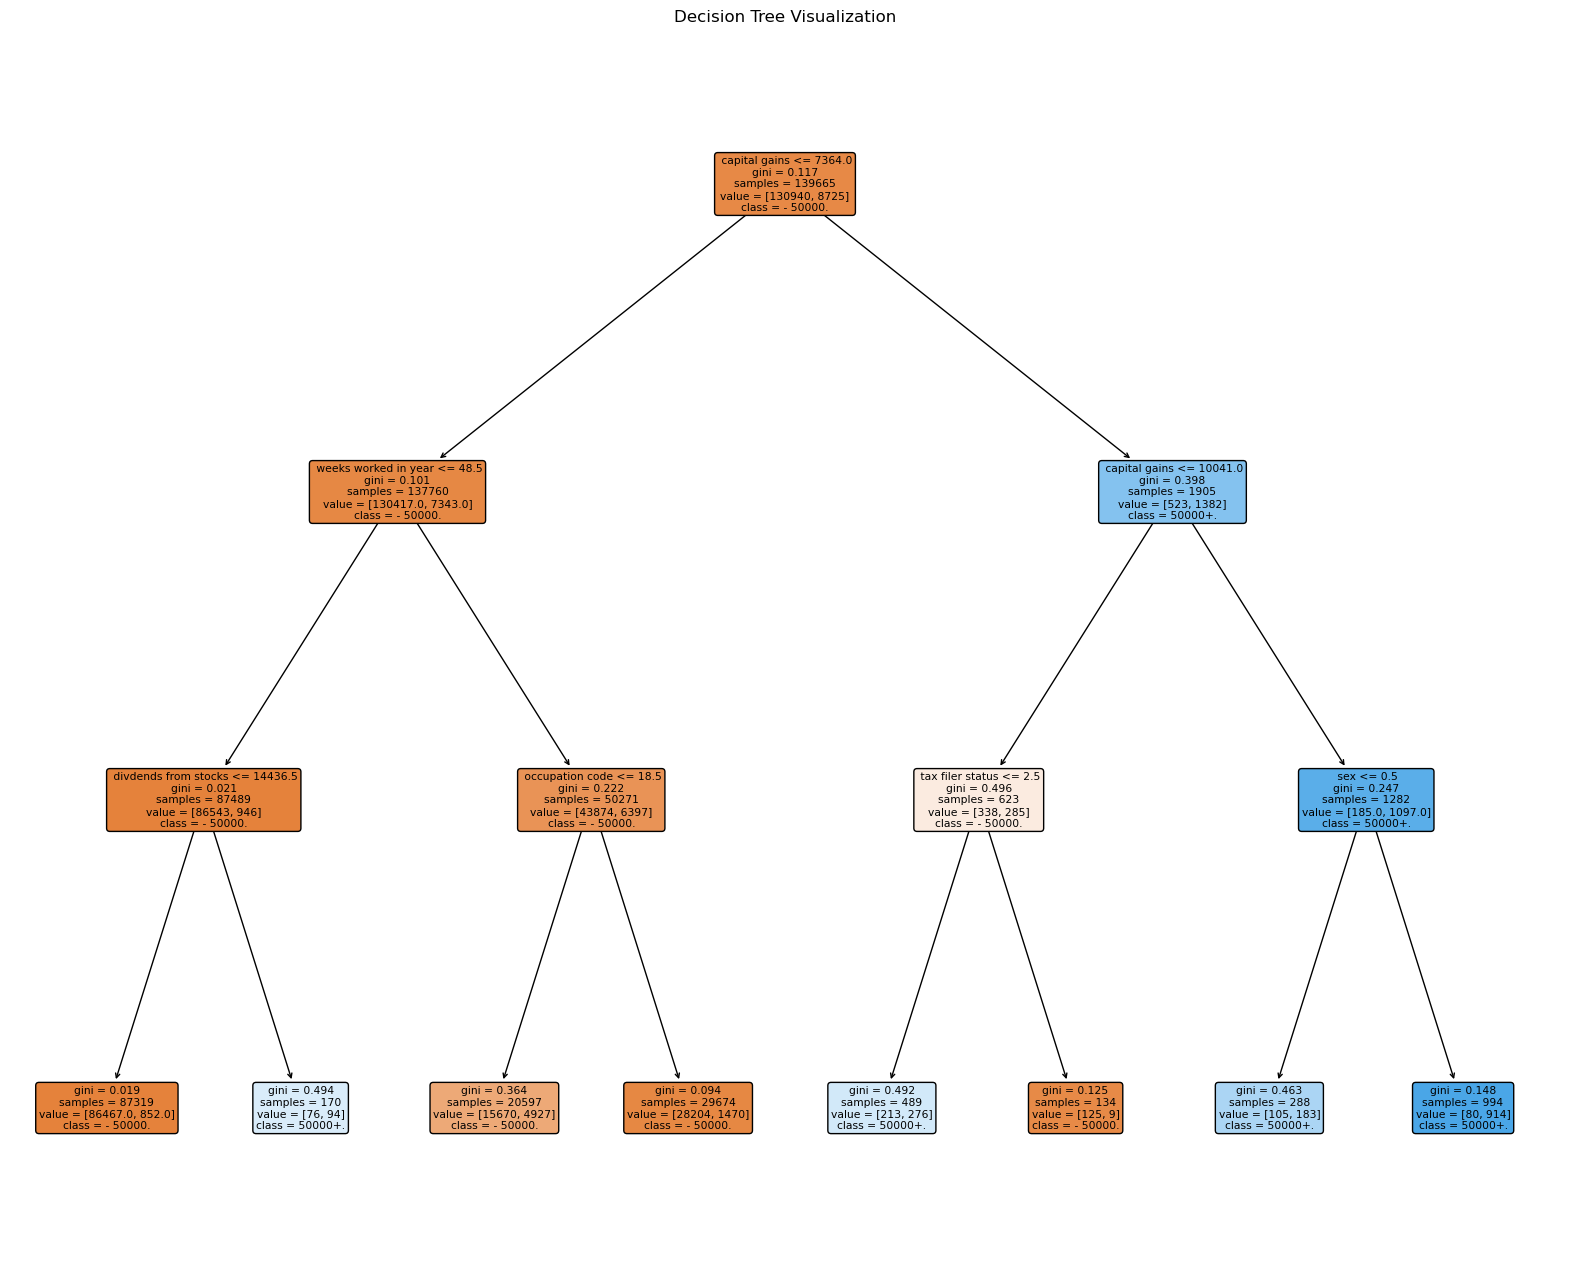

In [589]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,16))
plot_tree(clf, filled=True, feature_names=X.columns, class_names=label_encoder.classes_, rounded=True)
plt.title("Decision Tree Visualization")
plt.show()

In [603]:
#Feature importances
print(tree.feature_importances_)
np.argmax(tree.feature_importances_)
print(df.columns[16])
print(df.columns[3])
print(df.columns[18])


[0.         0.         0.         0.23268455 0.         0.
 0.         0.         0.         0.         0.         0.
 0.00958819 0.         0.         0.         0.48699136 0.
 0.02663176 0.0138351  0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.23026905 0.        ]
 capital gains
 occupation code
 divdends from stocks


In [597]:
'''Discussion:

According to my model the most important feature is the capital gains feature. Intuitively this makes sense because it represents a 
numerical value for the amount of revenue a person earned in investments and such. This is directly related to the amount of money a 
person makes yearly so it having a large weight is fair. I also think it makes sense from the standpoint that people with lower income
most likely do not have the ability to spend much of their salary in ventures that would produce capital gains meaning their capital gains
score will almost always be lower. In this mindset it also makes sense for those who spend more on capital investments make more on capital 
investments.
'''

'Discussion:\n\nAccording to my model the most important feature is the capital gains feature. Intuitively this makes sense because it represents a \nnumerical value for the amount of revenue a person earned in investments and such. This is directly related to the amount of money a \nperson makes yearly so it having a large weight is fair. I also think it makes sense from the standpoint that people with lower income\nmost likely do not have the ability to spend much of their salary in ventures that would produce capital gains meaning their capital gains\nscore will almost always be lower. In this mindset it also makes sense for those who spend more on capital investments make more on capital \ninvestments.\n'

In [595]:
#Final testing


In [583]:
x_test_set = test_df.iloc[:, :40]
y_test_set = test_df.iloc[:, -1]

test_pred = tree.predict(x_test_set)

#Evaluation metrics
accuracy = accuracy_score(y_test_set, test_pred)
print("Accuracy: ", accuracy)

#Classification report
print("\nClassification Report:")
print(classification_report(y_test_set, test_pred))

Accuracy:  0.9448932949749902

Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97    187140
           1       0.75      0.17      0.28     12382

    accuracy                           0.94    199522
   macro avg       0.85      0.58      0.62    199522
weighted avg       0.94      0.94      0.93    199522

